En este código vamos a realizar el método de Random Forest a partir de todas las bases de datos separadas. 

#### Separamos las bases de datos

In [52]:
data_afc = pd.read_csv('nuevo_df.csv', sep=',')
print(data_afc.columns)
num_filas = data_afc.shape[0]
print(num_filas)

Index(['Medicación.Actual', 'Alcohol', 'Otras.Drogas', 'Tuberculosis',
       'Nitratos.orgánicos', 'Hormonas.pancreáticas', 'Antitusígenos',
       'Fármacos.otológicos', 'Otro..especifique..1',
       'Tipo.de.Intervención.Quirúrgica',
       ...
       'Implante.5...Marca', 'Implante.5...Conexión.protésica',
       'Implante.5...Cuello.del.implante', 'Implante.5...Protocolo.colocación',
       'Implante.5...Angulación',
       'Implante.5...Injerto.de.tejido.blando.simultáneo', 'Implante.1.4',
       'Altura.disponible..mm..10', 'Espacio.medio.distal.disponible..mm..10',
       'duracion_intervencion'],
      dtype='object', length=301)
2981


In [53]:
num_filas = data.shape[0]
print(num_filas)

2981


In [55]:
# Importar la biblioteca pandas
import pandas as pd

# Cargar los datos
data = pd.read_csv('nuevo_df_sinAFC.csv', sep=',')

# Fraccionar los datos en distintos DataFrames
datos_Info_Pacientes = data.iloc[:, 0:11]
# Agregar duracion_intervencion a datos_Info_Pacientes
datos_Info_Pacientes = pd.concat([datos_Info_Pacientes, data_afc['duracion_intervencion']], axis=1)


datos_Patologia_Sistemica = data.iloc[:, 11:62]
# Agregar duracion_intervencion a datos_Patologia_Sistemica
datos_Patologia_Sistemica = pd.concat([datos_Patologia_Sistemica, data_afc['duracion_intervencion']], axis=1)

datos_Medicacion_Momento_Intervencion = data.iloc[:, 62:113]
# Agregar duracion_intervencion a datos_Medicacion_Momento_Intervencion
datos_Medicacion_Momento_Intervencion = pd.concat([datos_Medicacion_Momento_Intervencion, data_afc['duracion_intervencion']], axis=1)


datos_Implantologia = data.iloc[:, 113:901]
# Agregar duracion_intervencion a datos_Implantologia
datos_Implantologia = pd.concat([datos_Implantologia, data_afc['duracion_intervencion']], axis=1)

datos_Medicacion_Post_Intervencion = data.iloc[:, 900:925]
# Agregar duracion_intervencion a datos_Medicacion_Post_Intervencion
datos_Medicacion_Post_Intervencion = pd.concat([datos_Medicacion_Post_Intervencion, data_afc['duracion_intervencion']], axis=1)

C:\Users\Carla Deveaud\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (9,119,120,123,124,125,126,127,128,129,132,135,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,231,232,239,240,241,242,246,253,260,261,262,263,265,266,267,268,269,271,273,280,287,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,313,320,327,334,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,4

In [56]:
print(datos_Medicacion_Post_Intervencion.columns)

Index(['Supramid...5.0', 'Supramid...6.0', 'Cytoplast...No.sutura',
       'Cytoplast...4.0', 'Cytoplast...3.0', 'Cytoplast...5.0',
       'Cytoplast...6.0', 'Técnica.de.sutura',
       'Complicaciones.intraoperatorias..escribir.NO.en.caso.de.no.presentarse.',
       'Fotografías', 'Vídeo', 'Amoxicilina 750 mg', 'Clindamicina.300.mg',
       'Ibuprofeno.600.mg', 'Paracetamol.1.gr',
       'Clorxehidina.0.12....CPC.0.05.',
       'Amoxicilina.Ácido.Clavulánico.875.125.mg', 'Dacortin.30.mg',
       'Omeprazol.20.mg', 'Metamizol.575.mg',
       'Metilprednisolona.40.mg.inyectable',
       'Metilprednisolona.80.mg.inyectable', 'Amoxicilina.500.mg',
       'Amoxicilina.Ácido.Clavulánico.1000.125.mg', 'Metronidazol.250.mg',
       'duracion_intervencion'],
      dtype='object')


## 2. Autoclean<a name="id2"></a>

### Busqueda de Na's


In [57]:
datos_Info_Pacientes.isnull().sum()
datos_Patologia_Sistemica.isnull().sum()
datos_Medicacion_Momento_Intervencion.isnull().sum()
datos_Implantologia.isnull().sum()
datos_Medicacion_Post_Intervencion.isnull().sum()

Supramid...5.0                                                             0
Supramid...6.0                                                             0
Cytoplast...No.sutura                                                      0
Cytoplast...4.0                                                            0
Cytoplast...3.0                                                            0
Cytoplast...5.0                                                            0
Cytoplast...6.0                                                            0
Técnica.de.sutura                                                          0
Complicaciones.intraoperatorias..escribir.NO.en.caso.de.no.presentarse.    0
Fotografías                                                                0
Vídeo                                                                      0
Amoxicilina 750 mg                                                         0
Clindamicina.300.mg                                                        0

### Limpieza

In [58]:
from datacleaner import autoclean

datos_Info_Pacientes = datos_Info_Pacientes.astype(str)
datos_Info_Pacientes= autoclean(datos_Info_Pacientes)


datos_Patologia_Sistemica= autoclean(datos_Patologia_Sistemica)


datos_Medicacion_Momento_Intervencion= autoclean(datos_Medicacion_Momento_Intervencion)


datos_Implantologia = datos_Implantologia.astype(str)
datos_Implantologia= autoclean(datos_Implantologia)

datos_Medicacion_Post_Intervencion = datos_Medicacion_Post_Intervencion.astype(str)
datos_Medicacion_Post_Intervencion= autoclean(datos_Medicacion_Post_Intervencion)

## 3. Importancia de carácteristicas (RandomForest)<a name="id3"></a>


### Partición de los datos

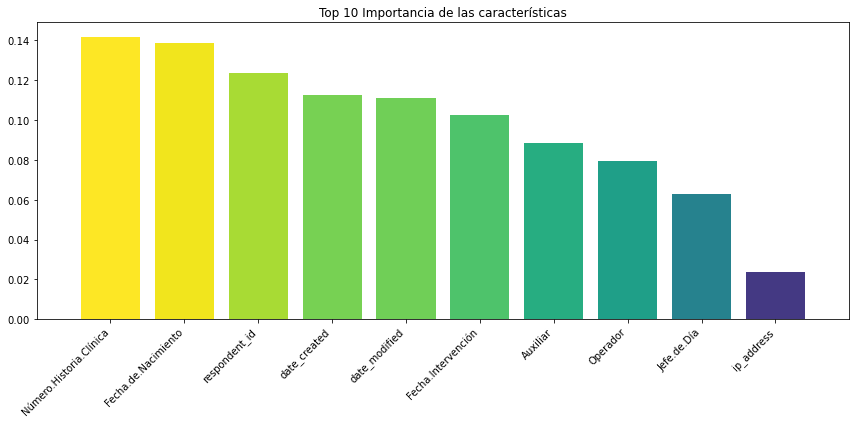

In [59]:
# datos_Info_Pacientes
from sklearn.model_selection import train_test_split

# Separar las características (X) y la variable objetivo (y)
X = datos_Info_Pacientes.drop('duracion_intervencion', axis=1)  # Aquí 'target_variable_column_name' es el nombre de la columna que contiene la variable objetivo
y = datos_Info_Pacientes['duracion_intervencion']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

# Modelo RandomForest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, Y_train)

# Obtener las importancias de las características y sus índices
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Seleccionar las 10 características más importantes
top_k = 10
sorted_importances = importances[indices[:top_k]]
sorted_indices = indices[:top_k]

# Nombres de las 10 características más importantes
feature_names = datos_Info_Pacientes.columns.tolist()

feature_names = np.array(feature_names)
top_k_feature_names = feature_names[sorted_indices]

colors = plt.cm.viridis(sorted_importances / sorted_importances.max())

# Dibujar la importancia de las 10 características más importantes
plt.figure(figsize=(12, 6))
plt.title("Top 10 Importancia de las características")
plt.bar(range(top_k), sorted_importances, color=colors, align="center")
plt.xticks(range(top_k), top_k_feature_names, rotation=45, ha='right')
plt.xlim([-1, top_k])
plt.tight_layout()
plt.show()

# Reducir el DataFrame completo a las 10 características más importantes
data_reduced = datos_Info_Pacientes[top_k_feature_names.tolist() + ['duracion_intervencion']]  # Incluye la columna objetivo nuevamente si es necesario

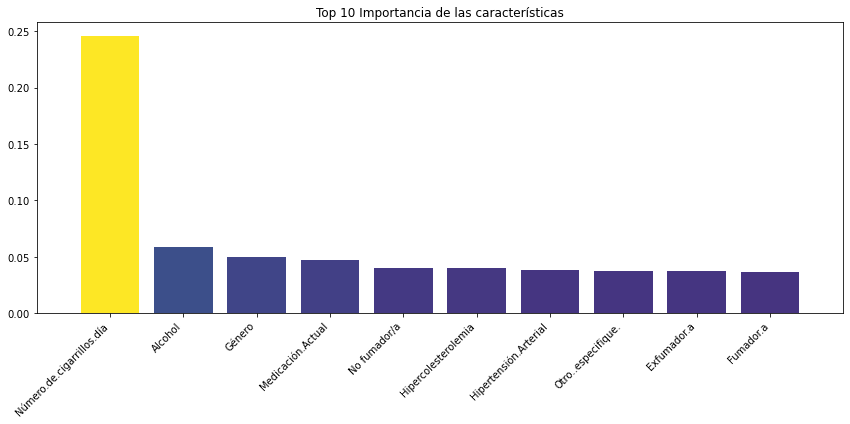

In [60]:
# datos_Patologia_Sistemica
from sklearn.model_selection import train_test_split

# Separar las características (X) y la variable objetivo (y)
X = datos_Patologia_Sistemica.drop('duracion_intervencion', axis=1)  # Aquí 'target_variable_column_name' es el nombre de la columna que contiene la variable objetivo
y = datos_Patologia_Sistemica['duracion_intervencion']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

# Modelo RandomForest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, Y_train)

# Obtener las importancias de las características y sus índices
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Seleccionar las 10 características más importantes
top_k = 10
sorted_importances = importances[indices[:top_k]]
sorted_indices = indices[:top_k]

# Nombres de las 10 características más importantes
feature_names = datos_Patologia_Sistemica.columns.tolist()

feature_names = np.array(feature_names)
top_k_feature_names = feature_names[sorted_indices]

colors = plt.cm.viridis(sorted_importances / sorted_importances.max())

# Dibujar la importancia de las 10 características más importantes
plt.figure(figsize=(12, 6))
plt.title("Top 10 Importancia de las características")
plt.bar(range(top_k), sorted_importances, color=colors, align="center")
plt.xticks(range(top_k), top_k_feature_names, rotation=45, ha='right')
plt.xlim([-1, top_k])
plt.tight_layout()
plt.show()

# Reducir el DataFrame completo a las 10 características más importantes
data_reduced = datos_Patologia_Sistemica[top_k_feature_names.tolist() + ['duracion_intervencion']]  # Incluye la columna objetivo nuevamente si es

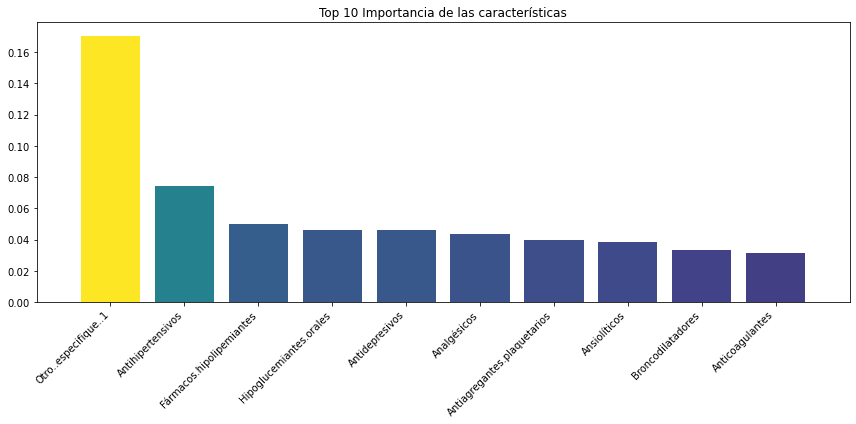

In [61]:
# datos_Medicacion_Momento_Intervencion
from sklearn.model_selection import train_test_split

# Separar las características (X) y la variable objetivo (y)
X = datos_Medicacion_Momento_Intervencion.drop('duracion_intervencion', axis=1)  # Aquí 'target_variable_column_name' es el nombre de la columna que contiene la variable objetivo
y = datos_Medicacion_Momento_Intervencion['duracion_intervencion']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

# Modelo RandomForest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, Y_train)

# Obtener las importancias de las características y sus índices
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Seleccionar las 10 características más importantes
top_k = 10
sorted_importances = importances[indices[:top_k]]
sorted_indices = indices[:top_k]

# Nombres de las 10 características más importantes
feature_names = datos_Medicacion_Momento_Intervencion.columns.tolist()

feature_names = np.array(feature_names)
top_k_feature_names = feature_names[sorted_indices]

colors = plt.cm.viridis(sorted_importances / sorted_importances.max())

# Dibujar la importancia de las 10 características más importantes
plt.figure(figsize=(12, 6))
plt.title("Top 10 Importancia de las características")
plt.bar(range(top_k), sorted_importances, color=colors, align="center")
plt.xticks(range(top_k), top_k_feature_names, rotation=45, ha='right')
plt.xlim([-1, top_k])
plt.tight_layout()
plt.show()

# Reducir el DataFrame completo a las 10 características más importantes
data_reduced = datos_Medicacion_Momento_Intervencion[top_k_feature_names.tolist() + ['duracion_intervencion']]  # Incluye la columna objetivo nuevamente si es

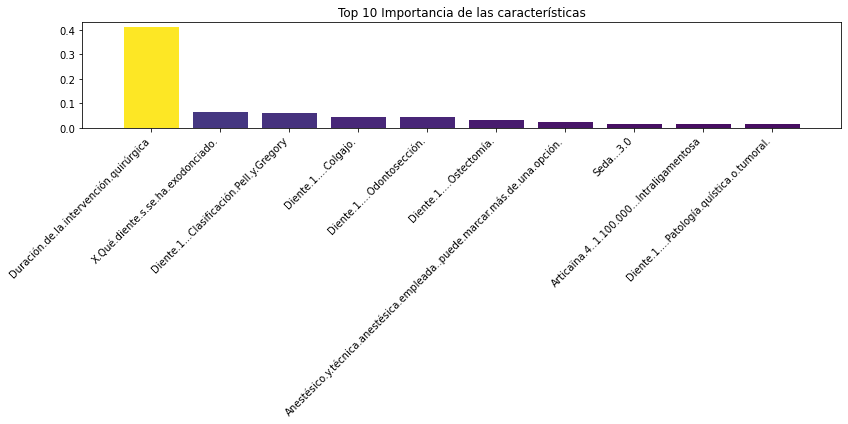

In [62]:
# datos_Implantologia
from sklearn.model_selection import train_test_split

# Separar las características (X) y la variable objetivo (y)
X = datos_Implantologia.drop('duracion_intervencion', axis=1)  # Aquí 'target_variable_column_name' es el nombre de la columna que contiene la variable objetivo
y = datos_Implantologia['duracion_intervencion']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

# Modelo RandomForest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, Y_train)

# Obtener las importancias de las características y sus índices
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Seleccionar las 10 características más importantes
top_k = 10
sorted_importances = importances[indices[:top_k]]
sorted_indices = indices[:top_k]

# Nombres de las 10 características más importantes
feature_names = datos_Implantologia.columns.tolist()

feature_names = np.array(feature_names)
top_k_feature_names = feature_names[sorted_indices]

colors = plt.cm.viridis(sorted_importances / sorted_importances.max())

# Dibujar la importancia de las 10 características más importantes
plt.figure(figsize=(12, 6))
plt.title("Top 10 Importancia de las características")
plt.bar(range(top_k), sorted_importances, color=colors, align="center")
plt.xticks(range(top_k), top_k_feature_names, rotation=45, ha='right')
plt.xlim([-1, top_k])
plt.tight_layout()
plt.show()

# Reducir el DataFrame completo a las 10 características más importantes
data_reduced = datos_Implantologia[top_k_feature_names.tolist() + ['duracion_intervencion']]  # Incluye la columna objetivo nuevamente si es

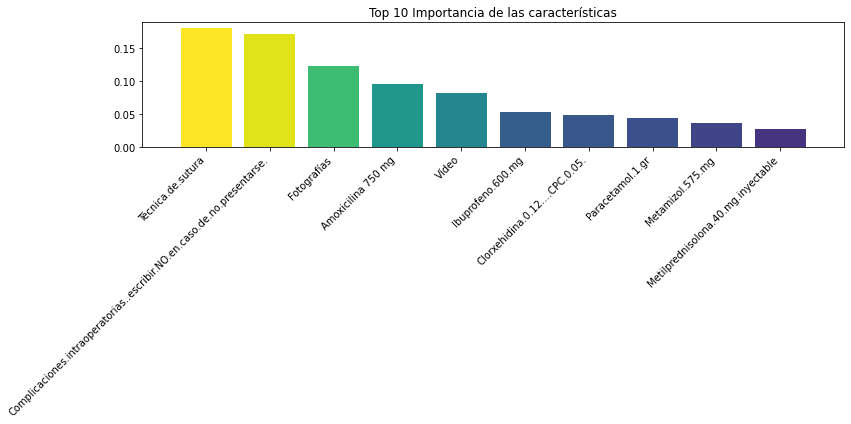

In [63]:
# datos_Medicacion_Post_Intervencion
from sklearn.model_selection import train_test_split

# Separar las características (X) y la variable objetivo (y)
X = datos_Medicacion_Post_Intervencion.drop('duracion_intervencion', axis=1)  # Aquí 'target_variable_column_name' es el nombre de la columna que contiene la variable objetivo
y = datos_Medicacion_Post_Intervencion['duracion_intervencion']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

# Modelo RandomForest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, Y_train)

# Obtener las importancias de las características y sus índices
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Seleccionar las 10 características más importantes
top_k = 10
sorted_importances = importances[indices[:top_k]]
sorted_indices = indices[:top_k]

# Nombres de las 10 características más importantes
feature_names = datos_Medicacion_Post_Intervencion.columns.tolist()

feature_names = np.array(feature_names)
top_k_feature_names = feature_names[sorted_indices]

colors = plt.cm.viridis(sorted_importances / sorted_importances.max())

# Dibujar la importancia de las 10 características más importantes
plt.figure(figsize=(12, 6))
plt.title("Top 10 Importancia de las características")
plt.bar(range(top_k), sorted_importances, color=colors, align="center")
plt.xticks(range(top_k), top_k_feature_names, rotation=45, ha='right')
plt.xlim([-1, top_k])
plt.tight_layout()
plt.show()

# Reducir el DataFrame completo a las 10 características más importantes
data_reduced = datos_Medicacion_Post_Intervencion[top_k_feature_names.tolist() + ['duracion_intervencion']]  # Incluye la columna objetivo nuevamente si es